The following code is based on [this](https://github.com/ayushgarg31/NLP-Assignment-1) notebook.

In [1]:
from nltk.tokenize import word_tokenize
import re
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

# Tom Sawyer
## Tokenization

In [3]:
#open file and convert it to lower case
file = open("random_texts/tom.txt", "r", encoding="utf8")
txt = file.read()
txt_lower = txt.lower()

#remove all special characters except - and _
special_chars = re.compile('[`~!@#$%^&*()+={}|\[\]:";<>?,\./“”]')
txt_lower = special_chars.sub("", txt_lower)

#tokenize using word_tokenizer
#token_list is a list of tokens
tokens_list = word_tokenize(txt_lower)
tokens_list = [i for i in tokens_list if len(re.findall('[a-z0-9]', i))!=0]
tokens = len(tokens_list)

file.close()

#count the number of times each token appears and save it in dictionary
#token_count is a dictionary with tokens as keys and their frequency as value
m = 500
token_count = {}
counter = 0
unique_words = []
for i in tokens_list:
    if (i in token_count.keys()):
        token_count[i] += 1
    else:
        token_count[i] = 1
    
    #count types after every m tokens for Heap's law
    if (counter%m == 0):
        unique_words.append(len(token_count.keys()))
    counter += 1
        
unique_words = unique_words[1:]
types = len(token_count.keys())
ttr = types/tokens

print ("The total number of tokens are : ", tokens)
print ("Different types of tokens are : ", types)
print ("The TTR (Type by Tokens Ratio) is :", ttr)

The total number of tokens are :  76664
Different types of tokens are :  8066
The TTR (Type by Tokens Ratio) is : 0.10521235521235521


## Frequency list

In [4]:
#convert dict to list and sort using frequency
#token_ranks is a 2d-matrix with each row contaning 1 - token and 2 - it's count
token_ranks = []
for i in token_count:
    token_ranks.append([i, token_count[i]])
    
token_ranks.sort(key = lambda x:x[1], reverse = True)


with open('tom_freq.txt', 'w') as file:
    file.writelines("%s\n" % place for place in token_ranks)

print ("Top 20 tokens and their frequency : \n",token_ranks[:20])

Top 20 tokens and their frequency : 
 [['the', 3970], ['and', 3174], ['a', 1919], ['to', 1801], ['of', 1584], ['it', 1324], ['he', 1249], ['was', 1179], ['that', 1034], ['in', 1012], ['i', 1006], ['you', 934], ['his', 820], ['tom', 817], ["'s", 802], ['with', 694], ['they', 616], ["n't", 598], ['but', 587], ['for', 559]]


# Heap's Law

<IPython.core.display.Javascript object>


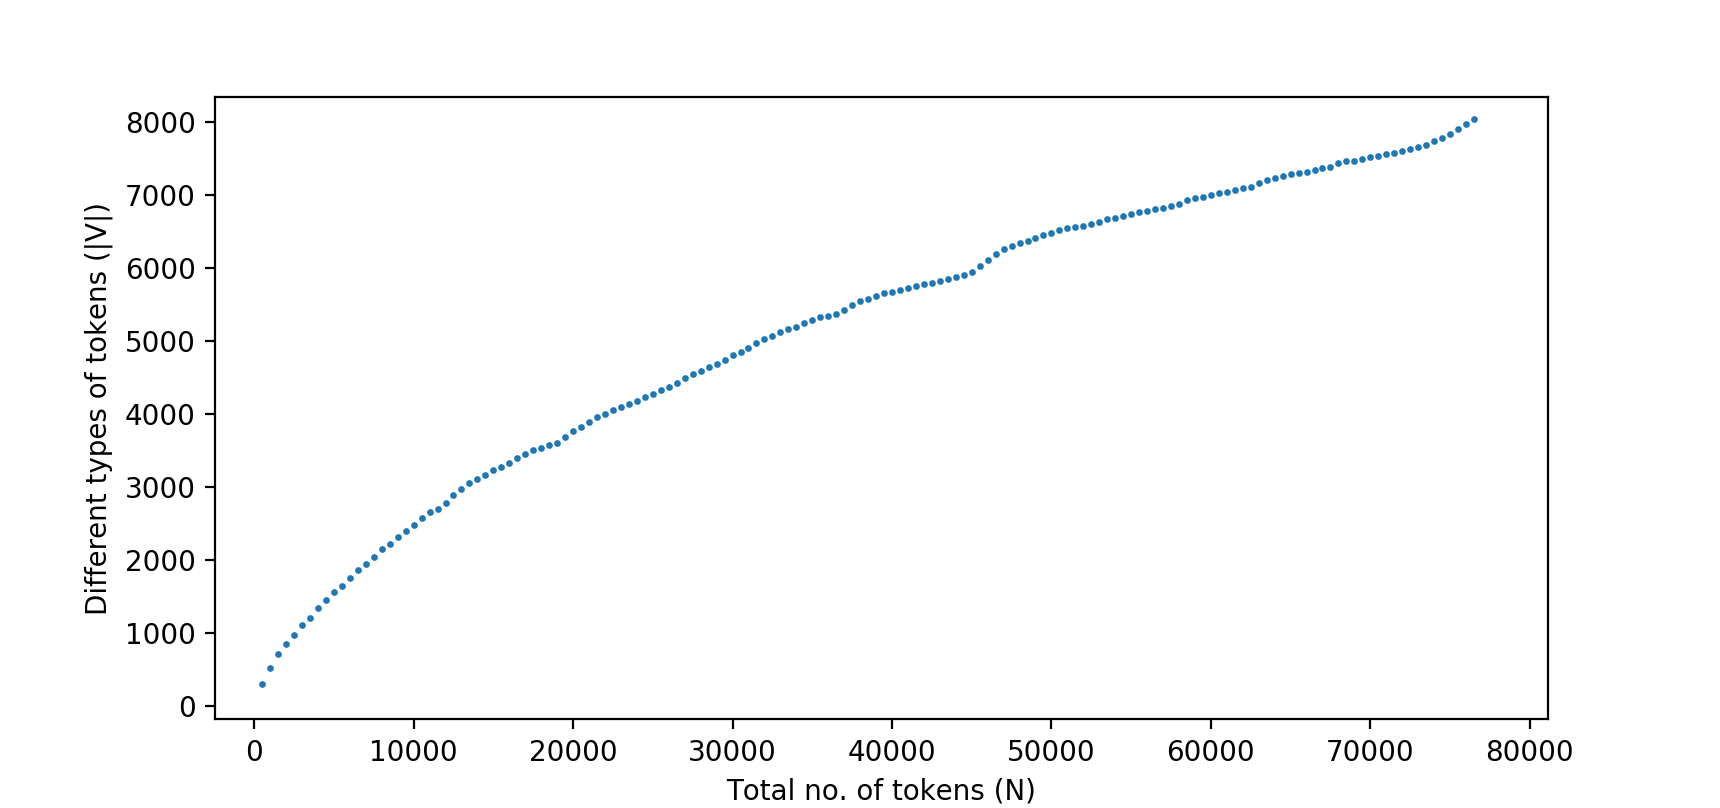

In [5]:
plt.scatter([(i+1)*m for i in range(len(unique_words))], [i for i in unique_words], s=2)
plt.ylabel('Different types of tokens (|V|)')
plt.xlabel('Total no. of tokens (N)')
plt.show()

# Zipf's Law

<IPython.core.display.Javascript object>


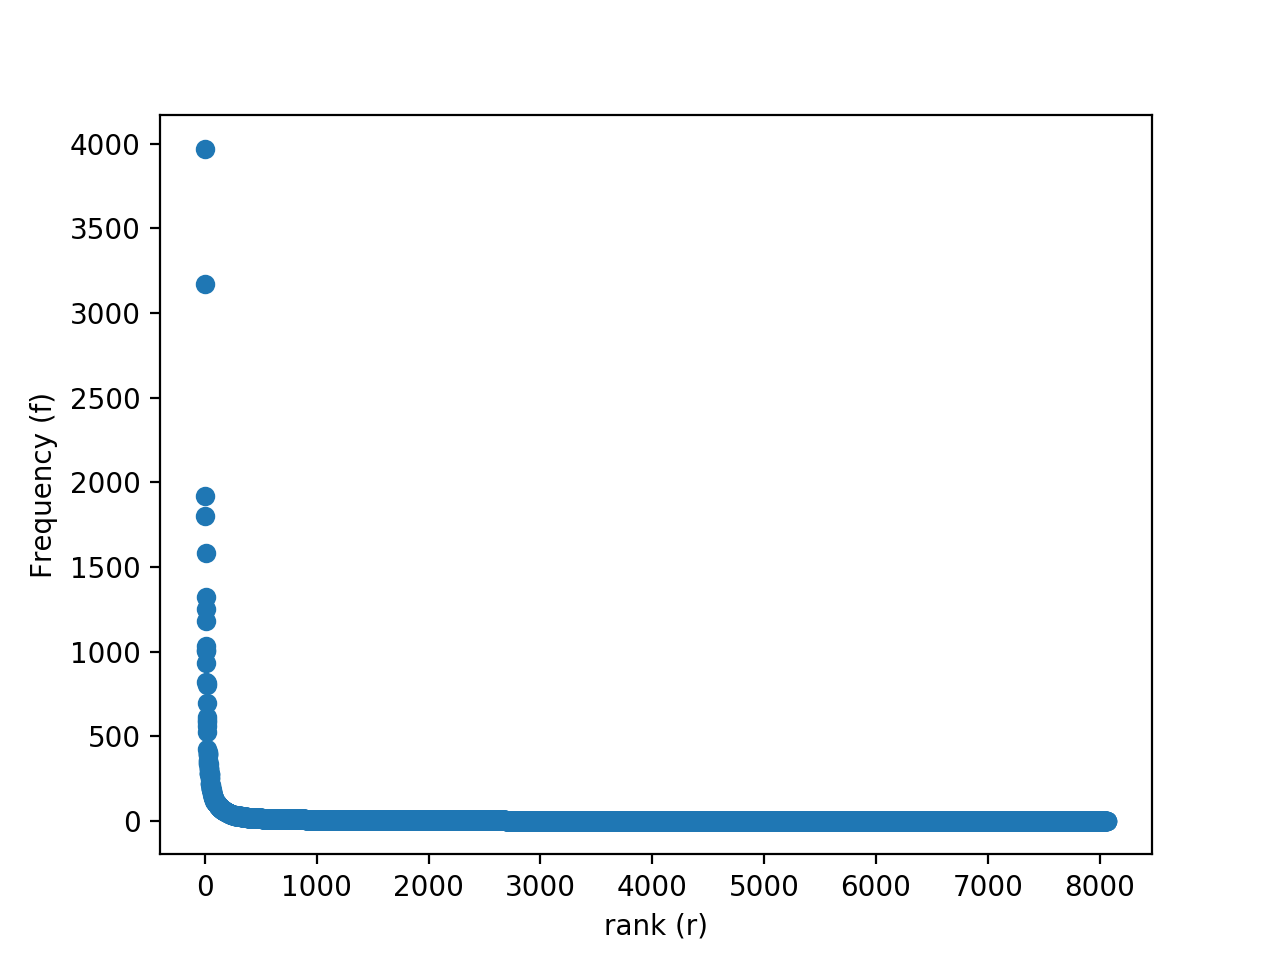

In [23]:
plt.scatter([i for i in range(1,types+1)], [token_ranks[i][1] for i in range(types)])
plt.ylabel('Frequency (f)')
plt.xlabel('rank (r)')
plt.show()